In [ ]:
import kagglehub

path = kagglehub.dataset_download("saurabh00007/diabetescsv")

! mv $path ./


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
df.notnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.isna().sum().sum()

np.int64(0)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

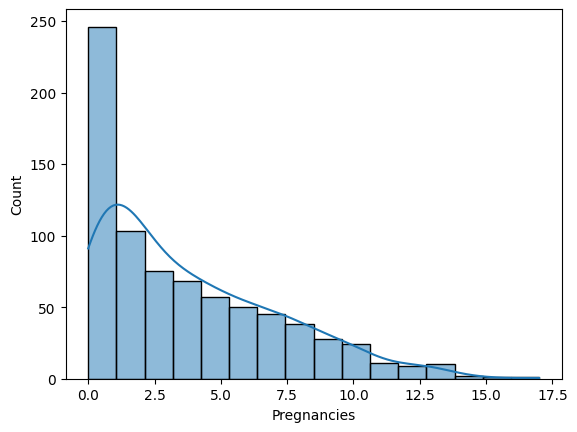

In [20]:
sns.histplot(df["Pregnancies"], kde=True); plt.show()

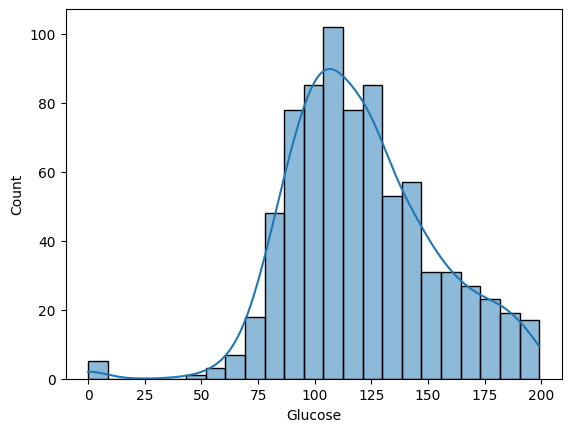

In [23]:
sns.histplot(df["Glucose"],kde=True); plt.show()

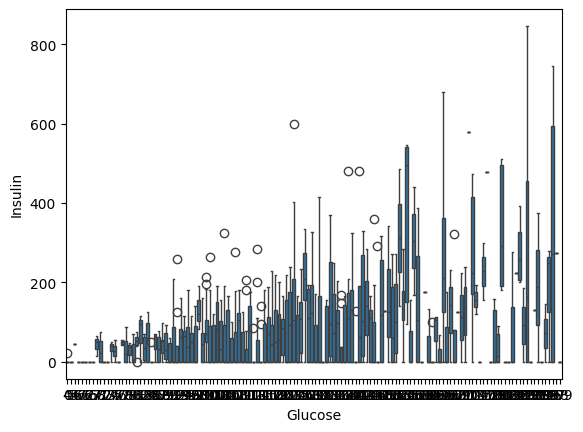

In [26]:
sns.boxplot(data=df, x="Glucose", y="Insulin"); plt.show()

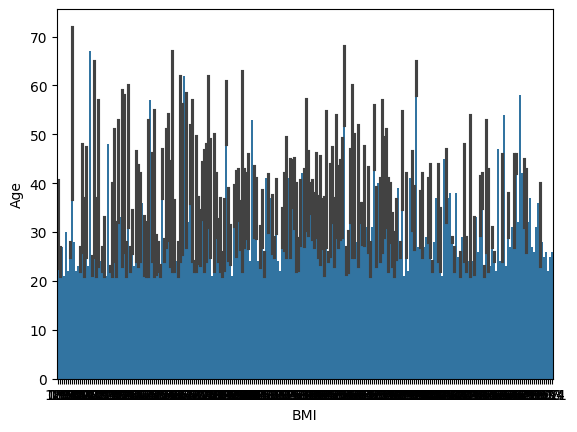

In [28]:
sns.barplot(data = df, x="BMI", y="Age", estimator="mean"); plt.show()

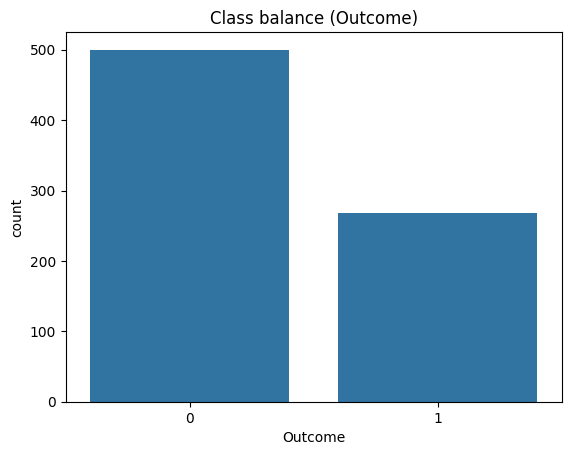

In [32]:
sns.countplot(data=df, x="Outcome")
plt.title("Class balance (Outcome)"dd); plt.show()

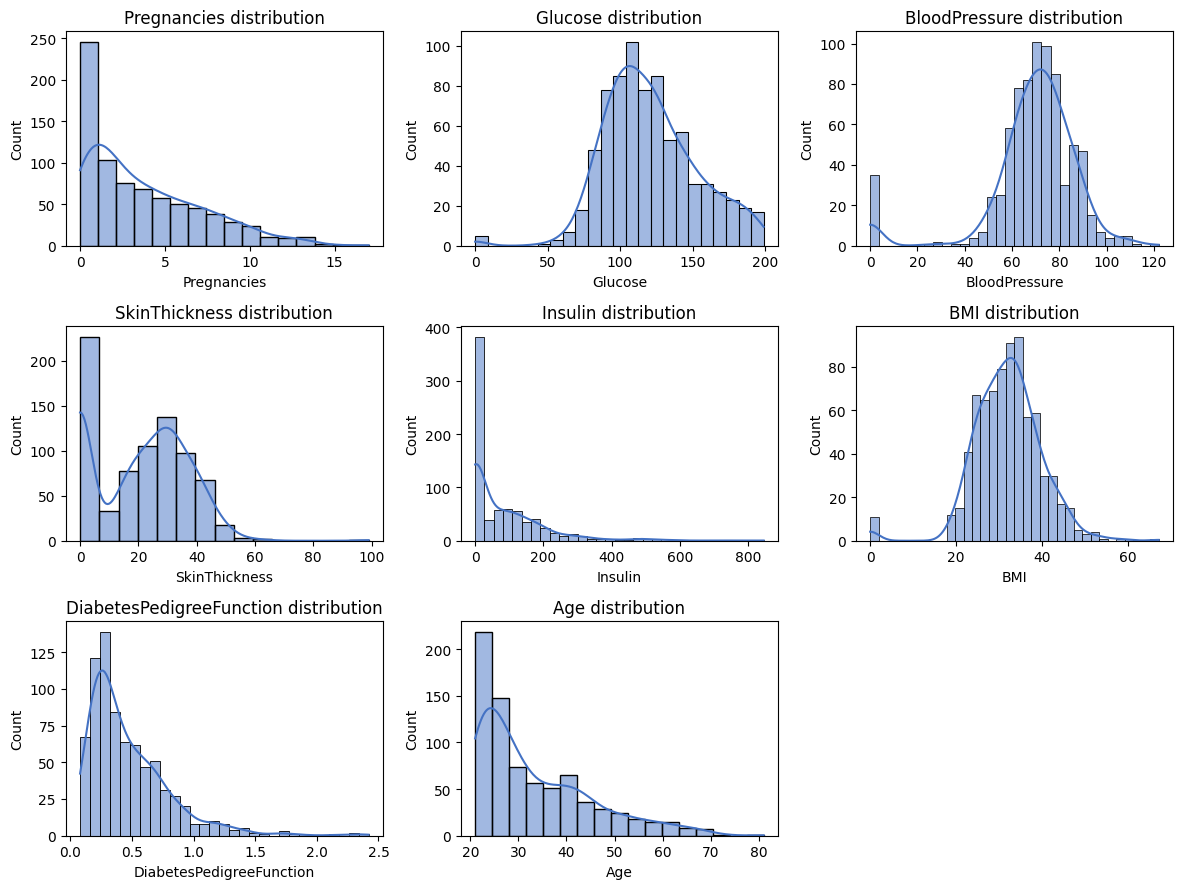

In [33]:
num_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
import math
rows = math.ceil(len(num_cols)/3)
fig, axes = plt.subplots(rows, 3, figsize=(12, 3*rows))
axes = axes.ravel()
for i, c in enumerate(num_cols):
    sns.histplot(df[c], kde=True, ax=axes[i], color="#4472C4")
    axes[i].set_title(f"{c} distribution")
for j in range(i+1, len(axes)): axes[j].axis("off")
plt.tight_layout(); plt.show()


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv("diabetes.csv")
X, y = df[["Glucose","Pregnancies","BMI","Insulin"]], df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)
print("train_score",train_score)
print("test_score",test_score)
# import matplotlib.pyplot as plt
# plt.scatter(X,y)
# plt.plot(X, lr.predict(X), color="red")
# plt.show()

train_score 0.2871037184169841
test_score 0.257170410602122
